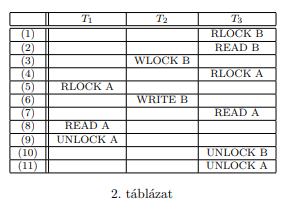
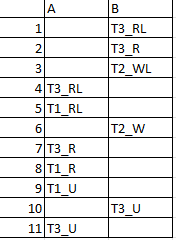

- mire gondolt a költő? adott tranzakciók (T1, T2, T3), adott lépésban (1,2,..11) adott adatblokkon (A,B) műveleteket végeznek. Ehhez zárolnak (lock), feloldják a zárat (unlock), olvasnak és írnak (read and write)

Definíció – legális ütemezés (legal schedule). Legális az az ütemezés, amelyben
-  a lockolt adategységeket fel is szabadítják (unlockkal), továbbá
- ha egy adategység már foglalt – mert egy másik tranzakció tart fenn zárat
rajta (ami nem megosztható) –, akkor a tranzakció a zár felszabadulásáig várakozik.

Problémák:
- lock- unlock párok megnézése: ahány lock- annyi unlock
    - T2 nincs unlock B-n 
- nem megosztható záron lock:
    - T2 WriteLock B-n nem kompatibilis a T3 által elhelyezett RL-kal B-n
    
megoldás: T2 unlock B-t beleírni és a T2 Write Lock elé tenni T3 Unlockot, vagy a T2 WriteLockot későbbre.

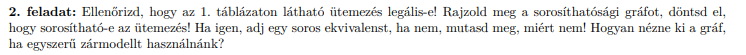

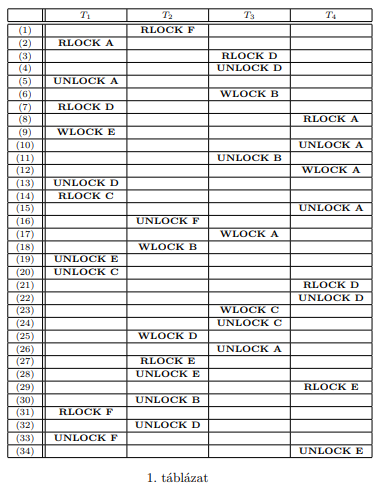

TK 177.o szerint rajzolt gráfok adategységenként, majd összevonva, cél DAG -> sorosítható \
ez RWLOCK zármodell!!!

két tranzakció között akkor rajzolunk élt, ha
- RL után WL
- WL után WL
- WL után RL

RL után RL, nem húzunk élt 
- off: 'A' esetében T1 és T4 RL után RL de utána WL szóval kell az él a T1 T4 közé T1 RL és T4 WL "közé"
- off: adott A és T1,T2,T3 és T1 RL_A és T2 RL_A, és T3 WL_A, akkor T1 RL_A és T3 WL_A közé is kell és T2 RL_A és T3 WL_A közé is kell, ez történik a D esetben
- off E eset: T1 WL után T2 és T4 is RL, ekkor T1 - T2 és T1 - T4 közé kell, de T2 és T4 közé nem kell

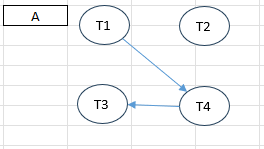
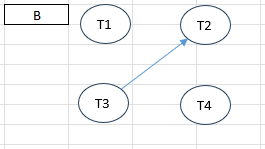
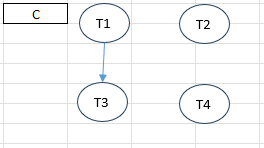
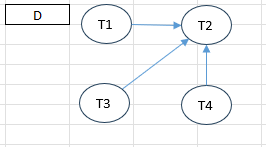
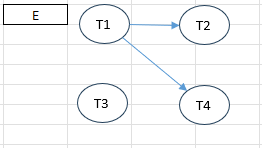
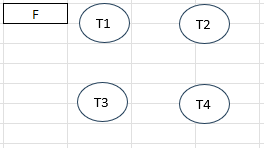

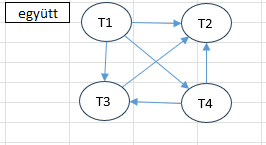

nincs benne kör, ezért sorosítható \
egy soros ekvivalens: 
- T1 -> T4 -> T3 -> T2

Egyszerű zármodellre: 

Definíció – egyszerű tranzakció modell (simple transaction model). Egyszerű tranzakció modellről beszélünk, ha
- csak egyfajta zár létezik
- egy adatelemen egyidőben csak egyetlen zár lehet

gráf él rajzolás tk 172. o. ábra alapján\
lock és unlock után a következő lockoló tranzakc felé

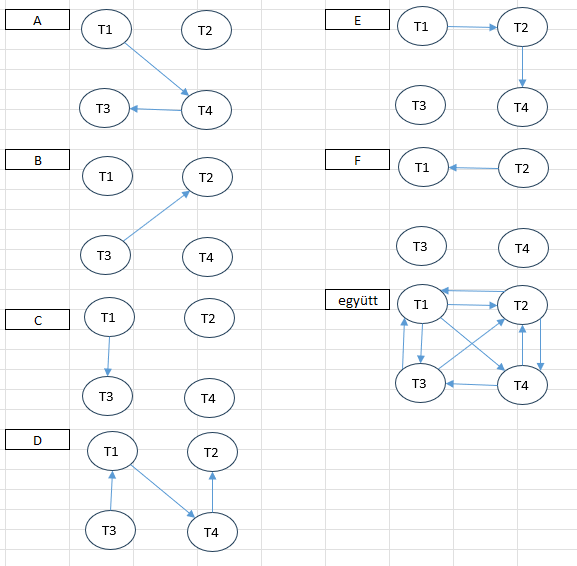

együtt: van benne kör -> nem sorosítható egyszerű zármodell mellett

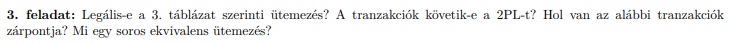

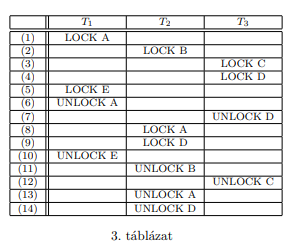
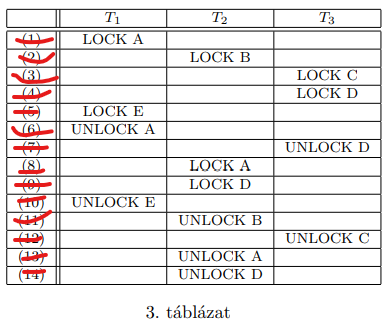

megnézzük hogy lock x és unlock x között van-e újabb lock x vmelyik más tranzakció által -> sérti a 2pl-t, ha nem kihúzzuk\
tehát tranzakción belül először lockok, majd zárak
és tranzakciók között nincs-e átfedés, lock még fel nem oldott adategységre\
mindhárom tranzakció először lockol majd unlockol, és nincs átfedés a zárkérések között \


Definíció – kétfázisú zárolás (two-phase locking, 2PL). Egy tranzakció a kétfázisú zárolás protokollt követia , ha az első zárfelszabadítást megelőzi mindegyik zárkérés. \
Első fázis: zárkérés, második fázis: zárfeloldás

Definíció – zárpont (synchronization point). Az az időpont, amikor egy kétfázisú protokoll szerinti tranzakció az utolsó zárját is megkapja.

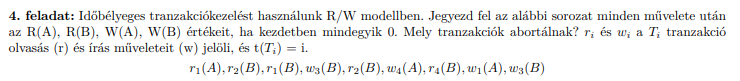

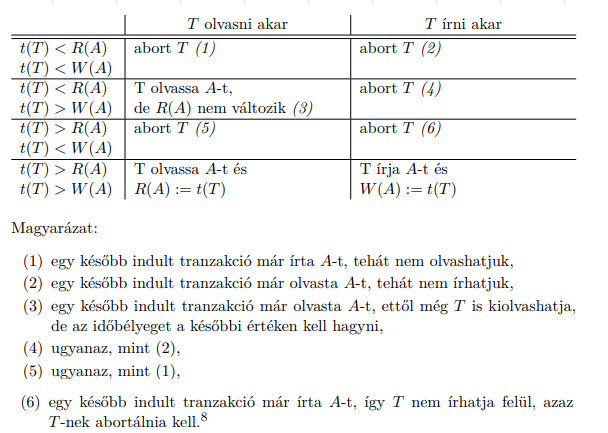

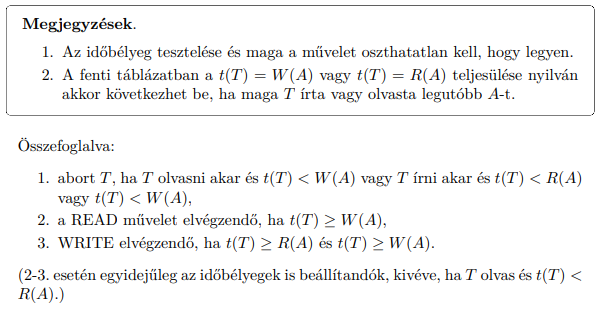

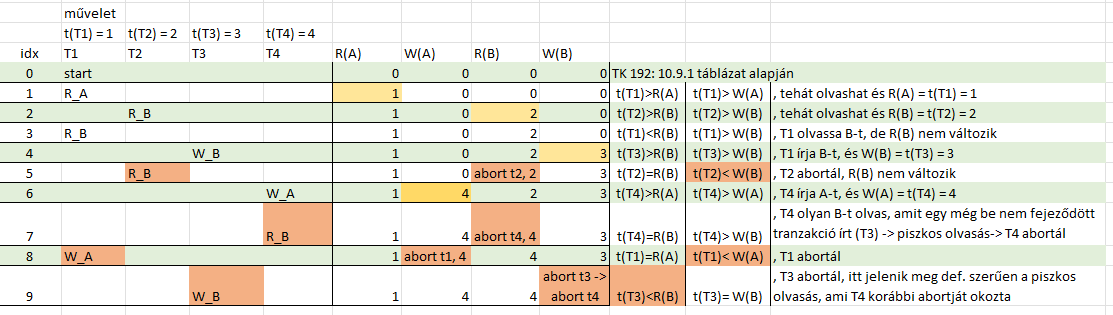

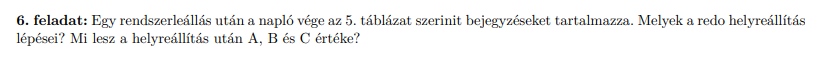

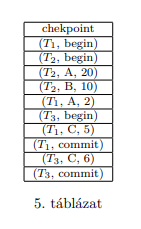

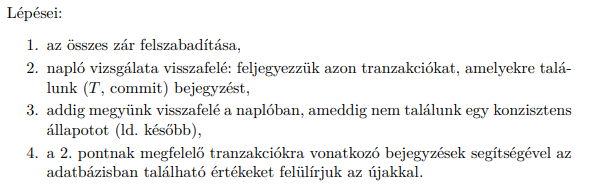

mivel T3 és T1 commitolt ezek a változások beírhatók a tárba, de a T2 még nem commitolt ezért az általa végzett módosításokat nem kerülhetnek mentésre, a régi értéküknek kell megmaradni. Checkpointig megyünk (konzisztens állapot)